# Linear Regression Project 2 

We will do one more linear regression project to confirm that the class fully understands these concepts. This time, we do expect that all of you create your own colab notebook and write the code as we do. By doing it yourself, you must understand all the concepts of the code. 

This project will be predicting the advertising value of a product based on its sales value. 

There are five steps in coding a linear regession model that we will follow today. These steps are generally applicable along all types of machine learning. 

1. <b>Data Collection:</b> Getting the data to train your model with
2. <b>Data Processing:</b> Manipulating the data to be custom and compatible with your project
3. <b>Training the model:</b> Using the data to improve your machine learning hypothesis function
4. <b>Assessing model accuracy:</b> Testing how accurate your model truly is
5. <b>Making predictions:</b> Using your finished model to make predictions on completely new data you have

## Data Collection

Our goal here is to prepare for actually training the model by acquiring all necessary materials. For now, that means we will access relevant libraries along with our dataset, which will be used together to train the model. 

We always start a project by importing our relevant libraries, which allows us to access pre-written commands that make our lives easier. Here, we import numpy, pandas, and matplot, which you should have learned about in the python class. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

At this point, we will import our dataset using the read_csv command. Through this command, we access the csv and convert it to a dataframe we can manipulate and work with through pandas. We first give the link to our dataset (which for now is in GitHub). We then specify that our header is none, which means that we don't give the columns any names for now. 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/SiP-AI-ML/LessonMaterials/master/sales_data.csv", header=None)

We want to confirm that our data looks how we expected. We can do so using the head() method, which allows us to view the top five rows of our dataset. 

In [ ]:
print(df.head())

      0     1
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0


## Data Processing

We now have a dataset that looks reasonable and the functions to carry them out. However, the data here isn't compatible with our model yet. Therefore, we have to change it around to input it. 

First, let's give our columns titles to make it easier to refer to them. 

In [ ]:
df.columns = ['Sales', 'Advertising']

To confirm that our columns were properly renamed, we will call the head function again.

In [ ]:
print(df.head())

   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0


Next, let's isolate our sales column and give it its own variable. This will allow us to specifically access the sales column while training our model, which will make the entire process much easier. 

In [ ]:
X = df['Sales'].values

We will do the same for y, which represents the advertising column. This will make the entire process of training and visualizing our data much easier.

In [ ]:
y = df['Advertising'].values

We have now isolated the columns of our dataset and given them their own variables, which is helpful for later use. However, our data is still incompatible with the machine learning model. We need to change the structure of our dataset in order to input it. 

Specifically, a machine learning model requires a 2D array. For those of you who haven't taken algebra, it's essentially a bunch of arrays in an array. We need to make our X and Y columns into 2D array to input them. 

We will do so using the numpy reshape method. We will make our first dimension -1; don't worry about this, as it is irrelevant and doesn't impact our dataset. The other dimension will be 1, which means the array is just 1 row of inputs.  


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

print(X)


[[12. ]
 [20.5]
 [21. ]
 [15.5]
 [15.3]
 [23.5]
 [24.5]
 [21.3]
 [23.5]
 [28. ]
 [24. ]
 [15.5]
 [17.3]
 [25.3]
 [25. ]
 [36.5]
 [36.5]
 [29.6]
 [30.5]
 [28. ]
 [26. ]
 [21.5]
 [19.7]
 [19. ]
 [16. ]
 [20.7]
 [26.5]
 [30.6]
 [32.3]
 [29.5]
 [28.3]
 [31.3]
 [32.3]
 [26.4]
 [23.4]
 [16.4]]


We need to train our data and improve our model's accuracy, but we also need to see how well our model is doing. To do this, we will split our data into 2 sections -- the training section and the testing section. We use the training section to improve our model and the testing section to assess its capabilities. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Training our model

Now that our dataset is properly distributed to input into the model, we can begin the initial process of training our model. 


We want to use sklearn's capabilities to train our model. We know that we want to use Linear Regression, so we import this from sklearn. However, we need a way to access all these functions, and we do so by initializing it as a variable. 

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Now, we have everything we need to begin training our model. We have the dataset in the proper configuration and have established the function we want to fit our data to. 

Training our model is one simple line of code, written below. Using this one line, the model first comes up with a starting hypothesis. Using the cost function and gradient descent (refer to Week 2), it gradually fits the line better and better to the training data to minimize the error margin. 

In [ ]:
lm.fit(X_train,y_train)

Now that we have trained our model, let's use a plot to visualize how well it fits to our data. It's not a great fit, but considering the disparity between the data, it fits as well as it can. 

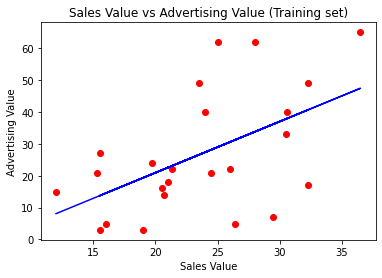

In [ ]:
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, lm.predict(X_train), color='blue')
plt.title('Sales Value vs Advertising Value (Training set)')
plt.xlabel('Sales Value')
plt.ylabel('Advertising Value')
plt.show()

## Making predictions




Now that we have a linear regression model fitted and trained on our data, we need to assess how well it can predict unknown data, which is the entire purpose of machine learning. To do so, we will now refer to the other section of our dataset, the testing section. We call the predict function to do so. 

In [ ]:
y_pred = lm.predict(X_test)

Now that we have used the model on data it hasn't seen before, let's visualize how well it fits. 

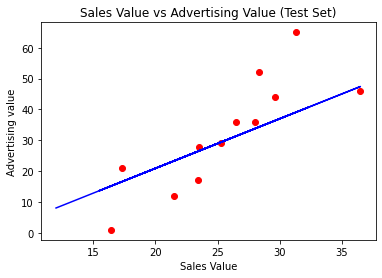

In [ ]:
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, lm.predict(X_train), color='blue')
plt.title('Sales Value vs Advertising Value (Test Set)')
plt.xlabel('Sales Value')
plt.ylabel('Advertising value')
plt.show()

## Making predictions

Now that our model is completely done, we can put it to use by making predictions. 


First, we can use it to predict the values of items in our dataset. Below, we predict the advertising value on the first five sales values of our dataset. 

In [ ]:
lm.predict(X)[0:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

We can also use it to predict the advertising value on sales data it hasn't seen before, which would make it useful for all types of expenditures. Remember that the input is always a 2D array, so before entering it into your model, you must follow this format. 

In [ ]:
# To make an individual prediction using the linear regression model.

givenPrediction = [[28]]

print(str(lm.predict(givenPrediction)))

[[33.78258106]]
